In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
%matplotlib notebook

In [2]:
disney_path = "Data/disney_plus_titles.csv"
disney_file = pd.read_csv(disney_path)
disney_file.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [3]:
disney_file.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
reduced_file = disney_file.drop_duplicates(subset="title")

In [5]:
reduced_file.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
reduced_file['converted_date_added'] = pd.to_datetime(reduced_file['date_added'])
reduced_file.dtypes

show_id                         object
type                            object
title                           object
director                        object
cast                            object
country                         object
date_added                      object
release_year                     int64
rating                          object
duration                        object
listed_in                       object
description                     object
converted_date_added    datetime64[ns]
dtype: object

In [14]:
reduced_file = reduced_file.sort_values(by="converted_date_added")
reduced_file.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,converted_date_added
1430,s1431,Movie,Blackbeard's Ghost,Robert Stevenson,"Peter Ustinov, Dean Jones, Suzanne Pleshette, ...",United States,"October 1, 2019",1968,G,107 min,"Comedy, Family, Fantasy",A track coach inherits the mischievous ghost o...,2019-10-01
1431,s1432,Movie,Brave Little Tailor,Bill Roberts,"Walt Disney, Marcelite Garner, Eddie Holden",United States,"October 1, 2019",1938,TV-PG,9 min,"Action-Adventure, Animation, Comedy","Mickey Mouse, a tailor, is appointed by the ki...",2019-10-01
1432,s1433,Movie,Justin Morgan had a Horse,Hollingsworth Morse,"Don Murray, Lana Wood, R.G. Armstrong, Gary Cr...",United States,"October 1, 2019",1972,TV-G,88 min,"Animals & Nature, Biographical, Drama",The story of the foundation sire of the Morgan...,2019-10-01
1433,s1434,Movie,Lady and the Tramp II: Scamp's Adventure,Darrell Rooney,"Scott Wolf, Alyssa Milano, Chazz Palminteri, J...","United States, Australia","October 1, 2019",2001,G,73 min,"Action-Adventure, Animation, Coming of Age","Itching for freedom, Lady's pup Scamp joins up...",2019-10-01
1435,s1436,Movie,The Cat from Outer Space,Norman Tokar,"Ken Berry, Sandy Duncan, Harry Morgan, Roddy M...",United States,"October 1, 2019",1978,G,104 min,"Comedy, Family, Science Fiction",A physicist tries to help an alien cat after i...,2019-10-01


In [21]:
filtered_reduced_file = reduced_file.loc[reduced_file['converted_date_added']>='2019-11-01']
filtered_reduced_file.head()
# len(filtered_reduced_file)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,converted_date_added
1412,s1413,TV Show,Wizards of Waverly Place,NaN,"Selena Gomez, David Henrie, Jake Austin, Jenni...",United States,"November 12, 2019",2007,TV-G,4 Seasons,"Comedy, Coming of Age, Fantasy","Alex, Justin, and Max Russo are not your ordin...",2019-11-12
1423,s1424,Movie,Z-O-M-B-I-E-S,Paul Hoen,"Milo Manheim, Meg Donnelly, Trevor Tordjman, K...",United States,"November 12, 2019",2018,TV-G,97 min,"Coming of Age, Musical, Science Fiction",A traditional high school must accept students...,2019-11-12
1422,s1423,Movie,Your Friend the Rat,Jim Capobianco,"Patton Oswalt, Peter Sohn, Lou Romano, Tony Ru...",United States,"November 12, 2019",2007,TV-G,13 min,"Animation, Comedy, Family",Remy explains why humans and rats should get a...,2019-11-12
1421,s1422,Movie,You Wish!,Paul Hoen,"A.J. Trauth, Spencer Breslin, Lalaine , Sally ...","New Zealand, United States","November 12, 2019",2003,TV-G,88 min,"Coming of Age, Drama, Fantasy",Alex uses a magical coin to wish he didn't hav...,2019-11-12
1420,s1421,Movie,You Lucky Dog,Paul Schneider,"Kirk Cameron, Chelsea Noble, John de Lancie, C...",United States,"November 12, 2019",1998,TV-G,88 min,"Comedy, Fantasy",Jack Morgan discovers a psychic connection bet...,2019-11-12


In [22]:
#count null values
filtered_reduced_file.isna().sum()

show_id                   0
type                      0
title                     0
director                469
cast                    190
country                 219
date_added                0
release_year              0
rating                    3
duration                  0
listed_in                 0
description               0
converted_date_added      0
dtype: int64

In [45]:
# count data by type
type_data = filtered_reduced_file['type'].value_counts()
type(type_data)
type_data

Movie      1043
TV Show     394
Name: type, dtype: int64

<IPython.core.display.Javascript object>


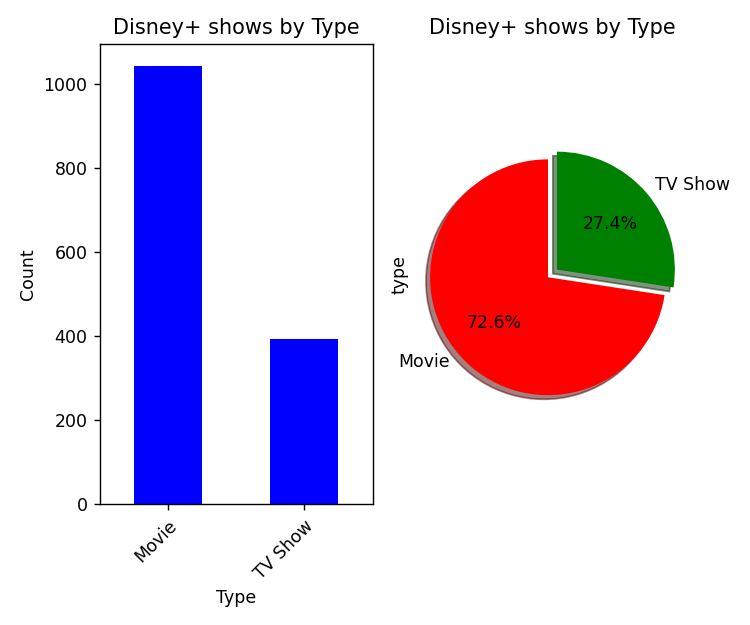

In [100]:
fig, axs = plt.subplots(1,2)

#produce a map of type
figure1 = type_data.plot(kind = "bar", figsize=(6,5),color="blue", title="Disney+ shows by Type",ax=axs[0])
figure1.set_xlabel("Type")
figure1.set_ylabel("Count")
# Configure x-tick rotation
xticklabels = type_data.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

#pie chart
figure2 = type_data.plot(kind = "pie", labels = type_data.index, figsize=(6,5),colors=['red','green'], explode = (0.1,0),autopct='%1.1f%%',shadow=True, startangle=90, title="Disney+ shows by Type",ax=axs[1])
plt.axis('equal')
plt.tight_layout()


In [93]:
#map by country
country_data = filtered_reduced_file['country'].value_counts()
country_data_map = country_data.head(10)
country_data_map

United States                    994
United States, Canada             30
United Kingdom                    23
United States, United Kingdom     22
Canada, United States             17
United Kingdom, United States     14
United States, Australia           7
Canada                             5
United States, France              4
United States, Japan               4
Name: country, dtype: int64

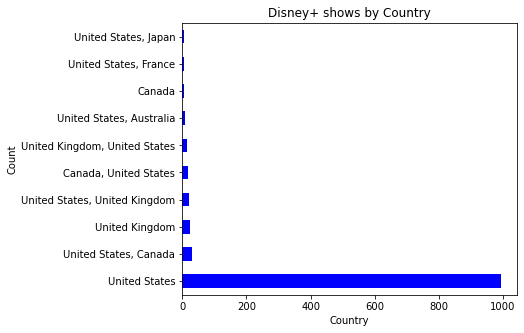

<Figure size 432x288 with 0 Axes>

In [162]:
#produce a map of type
figure3 = country_data_map.plot(kind = "barh", figsize=(6,5),color="blue", title="Disney+ shows by Country")
figure3.set_xlabel("Country")
figure3.set_ylabel("Count")
# Configure x-tick rotation
yticklabels = country_data_map.index
figure3.set_yticklabels(yticklabels, rotation_mode="anchor", ha="right", wrap=True)
plt.show()
plt.tight_layout()

In [168]:
movie_df = filtered_reduced_file.loc[reduced_file['type']=='Movie',:]
movie_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,converted_date_added,year_added
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,2021-11-24,2021
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,2021-11-26,2021
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",2021-11-26,2021
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,2021-11-26,2021
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021-11-26,2021


Populating the interactive namespace from numpy and matplotlib


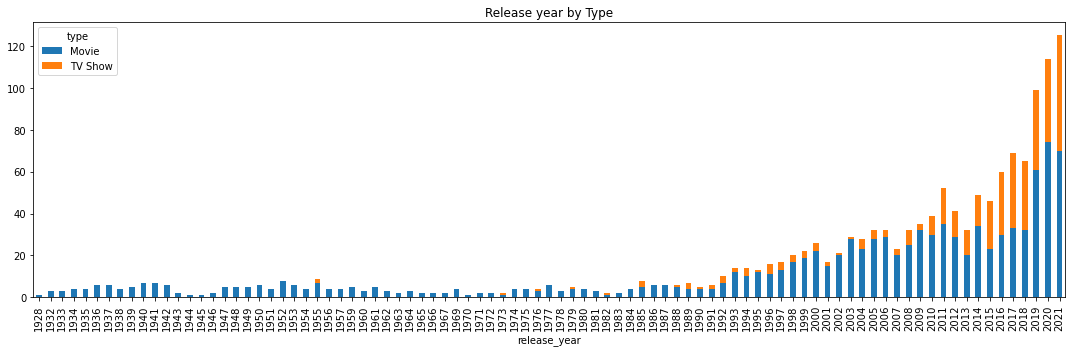

In [149]:
#map release year by type
%pylab inline
df = filtered_reduced_file.groupby(['type', 'release_year'])['release_year'].count().unstack('type').fillna(0)
df
df[['Movie',  'TV Show']].plot(kind='bar', stacked=True, figsize=(15, 5), title='Release year by Type')
plt.tight_layout()

Populating the interactive namespace from numpy and matplotlib


C:\Users\tnguyen59\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


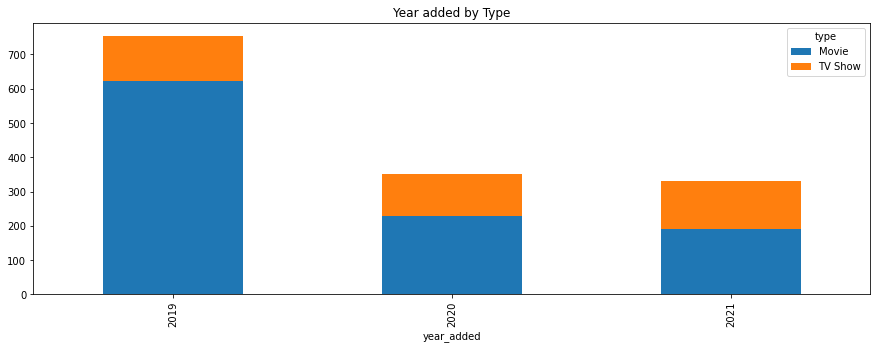

In [167]:
#map year added by type
%pylab inline
filtered_reduced_file['year_added'] =filtered_reduced_file['date_added'].str[-4:]
filtered_reduced_file
year_added_gb = filtered_reduced_file.groupby(['type', 'year_added'])['year_added'].count().unstack('type').fillna(0)
year_added_gb
year_added_gb[['Movie',  'TV Show']].plot(kind='bar', stacked=True, figsize=(15, 5), title='Year added by Type')
# plt.tight_layout()

Populating the interactive namespace from numpy and matplotlib


C:\Users\tnguyen59\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


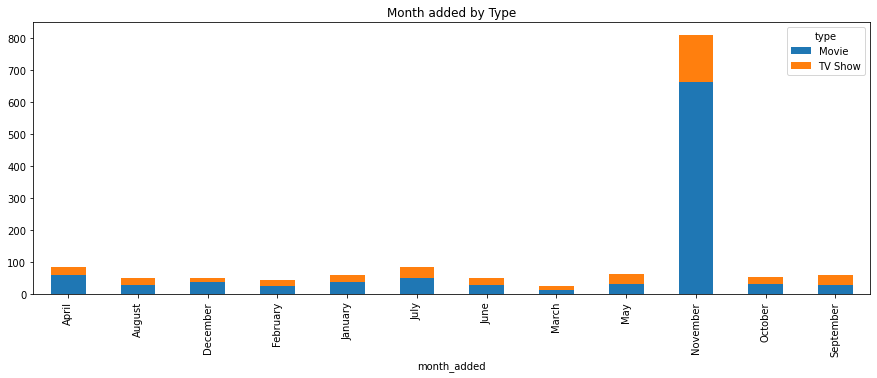

In [174]:
%pylab inline
filtered_reduced_file['month_added'] =filtered_reduced_file['date_added'].str.split().str.get(0)
filtered_reduced_file

year_added_gb = filtered_reduced_file.groupby(['type', 'month_added'])['month_added'].count().unstack('type').fillna(0)
year_added_gb
year_added_gb[['Movie',  'TV Show']].plot(kind='bar', stacked=True, figsize=(15, 5), title='Month added by Type')
# plt.tight_layout()

In [164]:
tvshow_df = filtered_reduced_file.loc[reduced_file['type']=='TV Show',:]
tvshow_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,converted_date_added,year_added
1412,s1413,TV Show,Wizards of Waverly Place,NaN,"Selena Gomez, David Henrie, Jake Austin, Jenni...",United States,"November 12, 2019",2007,TV-G,4 Seasons,"Comedy, Coming of Age, Fantasy","Alex, Justin, and Max Russo are not your ordin...",2019-11-12,NaN
1417,s1418,TV Show,X-Men: Evolution,NaN,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,"November 12, 2019",2000,TV-Y7,4 Seasons,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...,2019-11-12,NaN
1414,s1415,TV Show,Wolverine and The X-Men,NaN,"Steve Blum, Chris Edgerly, Jennifer Hale, Mich...",United States,"November 12, 2019",2008,TV-Y7,1 Season,"Action-Adventure, Animation, Kids",Wolverine and the X-Men must join together to ...,2019-11-12,NaN
1406,s1407,TV Show,Wild Yellowstone,NaN,Bart Thomasson,Germany,"November 12, 2019",2015,TV-PG,1 Season,"Animals & Nature, Docuseries, Travel",Wild Yellowstone captures the beauty and essen...,2019-11-12,NaN
1369,s1370,TV Show,Timon & Pumbaa,NaN,"Quinton Flynn, Ernie Sabella, Jim Cummings, Na...",United States,"November 12, 2019",1995,TV-Y,3 Seasons,"Animation, Buddy, Comedy","Timon, a meerkat, and Pumbaa, a warthog, join ...",2019-11-12,NaN
